# Proyek Analisis Data: E-Commerce
- Kelompok : 	IF 12 - 10123901
- Anggota : </br>
10123901 - Riksa Paradila Pasa</br>
10123907 - M. Nathan Fadhilah</br>
10123906 - M. Faishal R</br>
10123914 - Dimas Nurfauzi</br>
10123909 - Andi Tegar P</br>
10123455 - Naufal Fauzan R

## Menentukan Pertanyaan Bisnis

1. Apa faktor yang mempengaruhi kepuasan pelanggan berdasarkan ulasan yang diberikan?
2. Bagaimana traffic penjualan dari waktu ke waktu?
3. Analisis faktor yang mempengaruhi penjualan?
4. Bagaimana distribusi geografis pelanggan dan penjual, dan apakah ada pola tertentu dalam pengiriman?
5. Apa hubungan antara harga produk dan jumlah penjualan?
6. Bagaimana pengaruh waktu pengiriman terhadap kepuasan pelanggan?
7. Bagaimana pengaruh berat produk terhadap biaya pengiriman?
8. Apakah ada pola musiman dalam penjualan?
9. Bagaimana hubungan antara metode pembayaran dan status pesanan?
10. Di kota mana jika kita melakukan penjualan maka akan untung?

## Menyiapkan semua library yang dibuthkan

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from geopy.distance import geodesic
from itertools import combinations
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Data Wrangling

### Gathering Data

In [33]:
customers_df = pd.read_csv("customers_dataset.csv")
geolocation_df = pd.read_csv("geolocation_dataset.csv")
order_items_df = pd.read_csv("order_items_dataset.csv")
order_payments_df = pd.read_csv("order_payments_dataset.csv")
order_reviews_df = pd.read_csv("order_reviews_dataset.csv")
orders_df = pd.read_csv("orders_dataset.csv")
product_category_tl_df = pd.read_csv("product_category_name_translation.csv")
products_df = pd.read_csv("products_dataset.csv")
sellers_df = pd.read_csv("sellers_dataset.csv")

### Assessing Data

In [34]:
def cek_data(nama,data):
  print(f"\nDataset From: {nama}")
  print(f"\nData types: \n{data.dtypes}")
  print(f"\nMissing Values: \n{data.isnull().sum()}")
  print(f"\nDuplicates: {data.duplicated().values.any()}")
  print(f"\nExample data: \n{data.head(3)}")
  print(f"{'='*100}")

#### **Customer**

In [35]:
cek_data('customers_df',customers_df)


Dataset From: customers_df

Data types: 
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

Missing Values: 
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Duplicates: False

Example data: 
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo      

#### **Geolocation**

In [36]:
cek_data('geolocation_df',geolocation_df)


Dataset From: geolocation_df

Data types: 
geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

Missing Values: 
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Duplicates: True

Example data: 
   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  


#### **Order Items**

In [38]:
cek_data('order_items_df',order_items_df)


Dataset From: order_items_df

Data types: 
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

Missing Values: 
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Duplicates: False

Example data: 
                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd

#### **Order Payments**

In [39]:
cek_data('order_payments_df',order_payments_df)


Dataset From: order_payments_df

Data types: 
order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

Missing Values: 
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Duplicates: False

Example data: 
                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  


#### **Order Reviews**

In [40]:
cek_data('order_reviews_df',order_reviews_df)


Dataset From: order_reviews_df

Data types: 
review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

Missing Values: 
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Duplicates: False

Example data: 
                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   

   review_score review_comment_title review_comment_message  \
0             4                  NaN             

#### **Orders**

In [41]:
cek_data('orders_df',orders_df)


Dataset From: orders_df

Data types: 
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

Missing Values: 
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Duplicates: False

Example data: 
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  4

#### **Product Category**

In [42]:
cek_data('product_category_tl_df',product_category_tl_df)


Dataset From: product_category_tl_df

Data types: 
product_category_name            object
product_category_name_english    object
dtype: object

Missing Values: 
product_category_name            0
product_category_name_english    0
dtype: int64

Duplicates: False

Example data: 
    product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto


#### **Product**

In [43]:
cek_data('products_df',products_df)


Dataset From: products_df

Data types: 
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

Missing Values: 
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Duplicates: False

Example data: 
                         product_id product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5            perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                 artes   
2  96bd76ec8810374ed1b65e291975717f         espo

#### **Seller**

In [44]:
cek_data('sellers_df',sellers_df)


Dataset From: sellers_df

Data types: 
seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

Missing Values: 
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Duplicates: False

Example data: 
                          seller_id  seller_zip_code_prefix     seller_city  \
0  3442f8959a84dea7ee197c632cb2df15                   13023        campinas   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844      mogi guacu   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031  rio de janeiro   

  seller_state  
0           SP  
1           SP  
2           RJ  


### Cleaning Data

#### **Customer**

In [4]:
#customers

customers_df['customer_zip_code_prefix'] = pd.to_numeric(customers_df['customer_zip_code_prefix'], errors='coerce')
customers_df['customer_zip_code_prefix'] = customers_df['customer_zip_code_prefix'].astype('Int64')
customers_df['customer_city'] = customers_df['customer_city'].astype('string')
customers_df['customer_state'] = customers_df['customer_state'].astype('string')

customers_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  Int64 
 3   customer_city             99441 non-null  string
 4   customer_state            99441 non-null  string
dtypes: Int64(1), object(2), string(2)
memory usage: 3.9+ MB


#### **Geolocation**

In [5]:
#geolocation

geolocation_df['geolocation_zip_code_prefix'] = pd.to_numeric(geolocation_df['geolocation_zip_code_prefix'], errors='coerce')
geolocation_df['geolocation_zip_code_prefix'] = geolocation_df['geolocation_zip_code_prefix'].astype('Int64')
geolocation_df['geolocation_lat'] = pd.to_numeric(geolocation_df['geolocation_lat'], errors='coerce')
geolocation_df['geolocation_lat'] = geolocation_df['geolocation_lat'].astype('float64')
geolocation_df['geolocation_lng'] = pd.to_numeric(geolocation_df['geolocation_lng'], errors='coerce')
geolocation_df['geolocation_lng'] = geolocation_df['geolocation_lng'].astype('float64')
geolocation_df['geolocation_city'] = geolocation_df['geolocation_city'].astype('string')
geolocation_df['geolocation_state'] = geolocation_df['geolocation_state'].astype('string')

geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  Int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  string 
 4   geolocation_state            1000163 non-null  string 
dtypes: Int64(1), float64(2), string(2)
memory usage: 39.1 MB


#### **Order Items**

In [6]:
#order items

order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])
order_items_df['price'] = pd.to_numeric(order_items_df['price'], errors='coerce')
order_items_df['price'] = order_items_df['price'].astype('float64')
order_items_df['freight_value'] = pd.to_numeric(order_items_df['freight_value'], errors='coerce')
order_items_df['freight_value'] = order_items_df['freight_value'].astype('float64')

# Menambahkan kolom profit (keuntungan) sebagai price dikurangi freight_value
order_items_df['profit'] = order_items_df['price'] - order_items_df['freight_value']

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
 7   profit               112650 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 6.9+ MB


#### **Order Payments**

In [7]:
#order payments

order_payments_df['payment_sequential'] = pd.to_numeric(order_payments_df['payment_sequential'], errors='coerce')
order_payments_df['payment_sequential'] = order_payments_df['payment_sequential'].astype('Int64')
order_payments_df['payment_type'] = order_payments_df['payment_type'].astype('string')
order_payments_df['payment_installments'] = pd.to_numeric(order_payments_df['payment_installments'], errors='coerce')
order_payments_df['payment_installments'] = order_payments_df['payment_installments'].astype('Int64')
order_payments_df['payment_value'] = pd.to_numeric(order_payments_df['payment_value'], errors='coerce')
order_payments_df['payment_value'] = order_payments_df['payment_value'].astype('float64')

order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  Int64  
 2   payment_type          103886 non-null  string 
 3   payment_installments  103886 non-null  Int64  
 4   payment_value         103886 non-null  float64
dtypes: Int64(2), float64(1), object(1), string(1)
memory usage: 4.2+ MB


#### **Order Reviews**

In [8]:
#order review

order_reviews_df['review_score'] = pd.to_numeric(order_reviews_df['review_score'], errors='coerce')
order_reviews_df['review_score'] = order_reviews_df['review_score'].astype('Int64')
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].astype('string')
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].astype('string')
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])

# Mengisi kategori nama yang kosong menjadi 'Unknown'
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].fillna('Unknown')
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].fillna('Unknown')

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  Int64         
 3   review_comment_title     99224 non-null  string        
 4   review_comment_message   99224 non-null  string        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: Int64(1), datetime64[ns](2), object(2), string(2)
memory usage: 5.4+ MB


#### **Orders**

In [9]:
#orders

orders_df['order_status'] = orders_df['order_status'].astype('string')
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

# Drop row yang punya nilai null
orders_df.dropna(subset=['order_approved_at'], axis=0, inplace=True)
orders_df = orders_df.dropna(subset=['order_purchase_timestamp'])

# Reset index
orders_df.reset_index(drop=True, inplace=True)

customer_orders = orders_df.merge(customers_df, on='customer_id', how='left')
customer_payments = customer_orders.merge(order_payments_df, on='order_id', how='left')

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99281 entries, 0 to 99280
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99281 non-null  object        
 1   customer_id                    99281 non-null  object        
 2   order_status                   99281 non-null  string        
 3   order_purchase_timestamp       99281 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97644 non-null  datetime64[ns]
 6   order_delivered_customer_date  96462 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99281 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(2), string(1)
memory usage: 6.1+ MB


#### **Product Category**

In [10]:
#product category name translation

product_category_tl_df['product_category_name'] = product_category_tl_df['product_category_name'].astype('string')
product_category_tl_df['product_category_name_english'] = product_category_tl_df['product_category_name_english'].astype('string')

product_category_tl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     string
 1   product_category_name_english  71 non-null     string
dtypes: string(2)
memory usage: 1.2 KB


#### **Product**

In [11]:
#products

products_df['product_category_name'] = products_df['product_category_name'].astype('string')
products_df['product_name_lenght'] = pd.to_numeric(products_df['product_name_lenght'], errors='coerce')
products_df['product_name_lenght'] = products_df['product_name_lenght'].astype('Int64')
products_df['product_description_lenght'] = pd.to_numeric(products_df['product_description_lenght'], errors='coerce')
products_df['product_description_lenght'] = products_df['product_description_lenght'].astype('Int64')
products_df['product_photos_qty'] = pd.to_numeric(products_df['product_photos_qty'], errors='coerce')
products_df['product_photos_qty'] = products_df['product_photos_qty'].astype('Int64')
products_df['product_weight_g'] = pd.to_numeric(products_df['product_weight_g'], errors='coerce')
products_df['product_weight_g'] = products_df['product_weight_g'].astype('Int64')
products_df['product_length_cm'] = pd.to_numeric(products_df['product_length_cm'], errors='coerce')
products_df['product_length_cm'] = products_df['product_length_cm'].astype('Int64')
products_df['product_height_cm'] = pd.to_numeric(products_df['product_height_cm'], errors='coerce')
products_df['product_height_cm'] = products_df['product_height_cm'].astype('Int64')
products_df['product_width_cm'] = pd.to_numeric(products_df['product_width_cm'], errors='coerce')
products_df['product_width_cm'] = products_df['product_width_cm'].astype('Int64')

# Memperbaiki naming pada kolom
products_df.rename(columns={
    'product_name_lenght': 'product_name_length',
    'product_description_lenght': 'product_description_length'
}, inplace=True)

# Drop row yang punya nilai null
products_df.dropna(subset=['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], axis=0, inplace=True)

# Reset index
products_df.reset_index(drop=True, inplace=True)

# Mengisi kategori nama yang kosong menjadi 'Unknown'
products_df['product_category_name'] = products_df['product_category_name'].fillna('Unknown')

products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32949 entries, 0 to 32948
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   product_id                  32949 non-null  object
 1   product_category_name       32949 non-null  string
 2   product_name_length         32340 non-null  Int64 
 3   product_description_length  32340 non-null  Int64 
 4   product_photos_qty          32340 non-null  Int64 
 5   product_weight_g            32949 non-null  Int64 
 6   product_length_cm           32949 non-null  Int64 
 7   product_height_cm           32949 non-null  Int64 
 8   product_width_cm            32949 non-null  Int64 
dtypes: Int64(7), object(1), string(1)
memory usage: 2.5+ MB


#### **Seller**

In [12]:
#sellers

sellers_df['seller_zip_code_prefix'] = pd.to_numeric(sellers_df['seller_zip_code_prefix'], errors='coerce')
sellers_df['seller_zip_code_prefix'] = sellers_df['seller_zip_code_prefix'].astype('Int64')
sellers_df['seller_city'] = sellers_df['seller_city'].astype('string')
sellers_df['seller_state'] = sellers_df['seller_state'].astype('string')

sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   Int64 
 2   seller_city             3095 non-null   string
 3   seller_state            3095 non-null   string
dtypes: Int64(1), object(1), string(2)
memory usage: 99.9+ KB


## Exploratory Data Analysis (EDA)

### Descriptive Analysis

#### Statistik Deskriptif untuk Dataset Orders

In [45]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Disini Menampilkan data data semua order

#### Distribusi Review Score

In [46]:
review_score_counts = order_reviews_df['review_score'].value_counts()
fig = px.bar(review_score_counts, x=review_score_counts.index, y=review_score_counts.values, labels={'x': 'Review Score', 'y': 'Jumlah'}, title='Distribusi Review Score')
fig.show()

Disini Menampilkan jumlah Skor Review dari data order dan data order review

### Advanced Analysis

#### 1. Kategori Produk yang Paling Banyak Dibeli dan Pengaruhnya terhadap Pendapatan

In [47]:
order_items_products = order_items_df.merge(products_df, on='product_id')
order_items_products_category = order_items_products.merge(product_category_tl_df, on='product_category_name')
product_category_sales = order_items_products_category.groupby('product_category_name_english')['order_item_id'].count().reset_index()
product_category_sales.rename(columns={'order_item_id': 'jumlah_produk'}, inplace=True)

product_category_revenue = order_items_products_category.groupby('product_category_name_english')['price'].sum().reset_index()
product_category_revenue.rename(columns={'price': 'pendapatan'}, inplace=True)
product_category_analysis = product_category_sales.merge(product_category_revenue, on='product_category_name_english')
fig = px.bar(product_category_analysis, x='jumlah_produk', y='product_category_name_english', title='Kategori Produk yang Paling Banyak Dibeli', labels={'jumlah_produk': 'Jumlah Produk', 'product_category_name_english': 'Kategori Produk'})
fig.show()
fig = px.bar(product_category_analysis, x='pendapatan', y='product_category_name_english', title='Pendapatan per Kategori Produk', labels={'pendapatan': 'Pendapatan', 'product_category_name_english': 'Kategori Produk'})
fig.show()

Analisis ini bertujuan untuk mengidentifikasi kategori produk yang paling banyak dibeli dan kontribusinya terhadap pendapatan.

#### 2. Segmentasi Pelanggan (Analisis RFM)

In [49]:

orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
rfm = customer_orders.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (orders_df['order_purchase_timestamp'].max() - x.max()).days,
    'order_id': 'count'
}).rename(columns={'order_purchase_timestamp': 'Recency', 'order_id': 'Frequency'})

rfm['Monetary'] = customer_payments.groupby('customer_unique_id')['payment_value'].sum()
rfm.fillna(0, inplace=True)

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

cluster_labels = {0: 'High-Value Customers', 1: 'Churn Risk Customers', 2: 'Frequent Buyers'}
rfm['Cluster Label'] = rfm['Cluster'].map(cluster_labels)

fig = px.scatter_3d(rfm, x='Recency', y='Frequency', z='Monetary', color=rfm['Cluster Label'])
fig.show()

Segmentasi ini mengelompokkan pelanggan berdasarkan pola transaksi mereka. Beberapa metode clustering yang dilakukan :

**RFM (Recency, Frequency, Monetary)** untuk mengukur perilaku pelanggan:
- **Recency**: Seberapa baru pelanggan melakukan transaksi terakhirnya.
- **Frequency**: Seberapa sering pelanggan berbelanja.
- **Monetary**: Total nilai transaksi pelanggan.

**K-Means Clustering** untuk membagi pelanggan ke dalam 3 segmen utama:
- **High-Value Customers**: Pelanggan yang sering berbelanja dan memiliki nilai transaksi tinggi.
- **Churn Risk Customers**: Pelanggan yang sudah lama tidak berbelanja dan memiliki frekuensi transaksi rendah.
- **Frequent Buyers**: Pelanggan yang sering melakukan pembelian tetapi dengan nilai transaksi yang lebih kecil.

#### 3. Distribusi Geografik Pelanggan

In [ ]:
geo_customers = customers_df.merge(geolocation_df, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
geo_summary = geo_customers.groupby(['customer_state']).agg({'geolocation_lat': 'mean',
                                                            'geolocation_lng': 'mean',
                                                            'customer_unique_id': 'count'}).reset_index()

state_mapping = {
    "AC": "Acre", "AL": "Alagoas", "AP": "Amapá", "AM": "Amazonas", "BA": "Bahia",
    "CE": "Ceará", "DF": "Distrito Federal", "ES": "Espírito Santo", "GO": "Goiás",
    "MA": "Maranhão", "MT": "Mato Grosso", "MS": "Mato Grosso do Sul", "MG": "Minas Gerais",
    "PA": "Pará", "PB": "Paraíba", "PR": "Paraná", "PE": "Pernambuco", "PI": "Piauí",
    "RJ": "Rio de Janeiro", "RN": "Rio Grande do Norte", "RS": "Rio Grande do Sul",
    "RO": "Rondônia", "RR": "Roraima", "SC": "Santa Catarina", "SP": "São Paulo",
    "SE": "Sergipe", "TO": "Tocantins"
}
geo_summary["customer_state"] = geo_summary["customer_state"].map(state_mapping)
fig_map = px.scatter_geo(geo_summary,
                        lat='geolocation_lat',
                        lon='geolocation_lng',
                        size='customer_unique_id',
                        hover_name='customer_state',
                        color_discrete_sequence=['blue'],
                        size_max=50,)
fig_map.show()
print(geo_summary.nlargest(5, 'customer_unique_id'))

Visualisasi ini menunjukkan persebaran pelanggan berdasarkan **state** di peta.

#### 4. Prediksi Jumlah Pelanggan Aktif (6 Bulan ke Depan)

In [50]:
orders_df = orders_df[orders_df["order_status"] == "delivered"]
orders_df["order_date"] = orders_df["order_purchase_timestamp"].dt.date
active_customers = orders_df.groupby("order_date")["customer_id"].nunique().reset_index()
active_customers.columns = ["date", "active_customers"]

active_customers["date"] = pd.to_datetime(active_customers["date"])
active_customers["date_ordinal"] = active_customers["date"].map(lambda x: x.toordinal())

X = active_customers[["date_ordinal"]]
y = active_customers["active_customers"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

future_dates = pd.date_range(start=active_customers["date"].max(), periods=180)
future_dates_ordinal = pd.DataFrame(future_dates.map(lambda x: x.toordinal()), columns=["date_ordinal"])
future_predictions = model.predict(future_dates_ordinal)

historical_data = pd.DataFrame({
    "Tanggal": active_customers["date"],
    "Jumlah Pelanggan Aktif": active_customers["active_customers"],
    "Tipe": "Aktual"
})

future_data = pd.DataFrame({
    "Tanggal": future_dates,
    "Jumlah Pelanggan Aktif": future_predictions,
    "Tipe": "Prediksi"
})

visual_data = pd.concat([historical_data, future_data])

fig = px.line(visual_data, x="Tanggal", y="Jumlah Pelanggan Aktif", color="Tipe",
                title="Prediksi Jumlah Pelanggan Aktif (6 Bulan ke Depan)",
                labels={"Jumlah Pelanggan Aktif": "Jumlah Pelanggan Aktif", "Tanggal": "Tanggal"},
                line_dash="Tipe",
                color_discrete_map={"Aktual": "blue", "Prediksi": "red"})

fig.show()

<ipython-input-50-a0551a8abafa>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### 5. Faktor yang Mempengaruhi Kepuasan Pelanggan

In [51]:
review_score_avg = order_reviews_df.groupby('order_id')['review_score'].mean().reset_index()
orders_with_reviews = orders_df.merge(review_score_avg, on='order_id')
orders_with_reviews['delivery_time'] = (pd.to_datetime(orders_with_reviews['order_delivered_customer_date']) - pd.to_datetime(orders_with_reviews['order_purchase_timestamp'])).dt.days
fig = px.scatter(orders_with_reviews.head(100), x='delivery_time', y='review_score', title='Hubungan Waktu Pengiriman dan Review Score', labels={'delivery_time': 'Waktu Pengiriman (hari)', 'review_score': 'Review Score'})
fig.show()

Analisis ini bertujuan untuk memahami bagaimana skor ulasan terdistribusi dan faktor-faktor yang mungkin mempengaruhi kepuasan pelanggan.

#### 6. Traffic Penjualan dari Waktu ke Waktu

In [24]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')
monthly_sales = orders_df.groupby('order_month')['order_id'].count().reset_index()
monthly_sales['order_month'] = monthly_sales['order_month'].dt.to_timestamp()
fig = px.line(monthly_sales, x='order_month', y='order_id', title='Traffic Penjualan dari Waktu ke Waktu', labels={'order_month': 'Bulan', 'order_id': 'Jumlah Pesanan'})
fig.show()

Analisis ini akan menunjukkan tren penjualan dari waktu ke waktu, membantu dalam memahami pola musiman dan fluktuasi penjualan.

#### 7. Hubungan Harga Produk dan Jumlah Penjualan

In [52]:
product_sales = order_items_df.groupby('product_id').agg({'price': 'mean', 'order_item_id': 'count'}).reset_index()
product_sales.rename(columns={'order_item_id': 'jumlah_penjualan'}, inplace=True)
fig = px.scatter(product_sales.head(100), x='price', y='jumlah_penjualan', title='Hubungan Harga Produk dan Jumlah Penjualan')
fig.show()

Analisis ini akan membantu memahami apakah ada hubungan antara harga produk dan volume penjualan.

#### 8. Pengaruh Waktu Pengiriman terhadap Kepuasan Pelanggan

In [28]:
fig = px.scatter(orders_with_reviews.head(100), x='delivery_time', y='review_score', title='Pengaruh Waktu Pengiriman terhadap Kepuasan Pelanggan', labels={'delivery_time': 'Waktu Pengiriman (hari)', 'review_score': 'Review Score'})
fig.show()


Analisis ini bertujuan untuk mengeksplorasi hubungan antara waktu pengiriman dan kepuasan pelanggan.

#### 9. Pola Musiman dalam Penjualan

In [29]:
monthly_sales = orders_df.groupby('order_month')['order_id'].count().reset_index()
monthly_sales['order_month'] = monthly_sales['order_month'].dt.to_timestamp()
fig = px.line(monthly_sales, x='order_month', y='order_id', title='Pola Musiman dalam Penjualan', labels={'order_month': 'Bulan', 'order_id': 'Jumlah Pesanan'})
fig.show()

Analisis ini akan membantu mengidentifikasi pola musiman dalam penjualan, yang dapat mempengaruhi strategi inventaris dan pemasaran.

#### 10. Hubungan antara Metode Pembayaran dan Status Pesanan

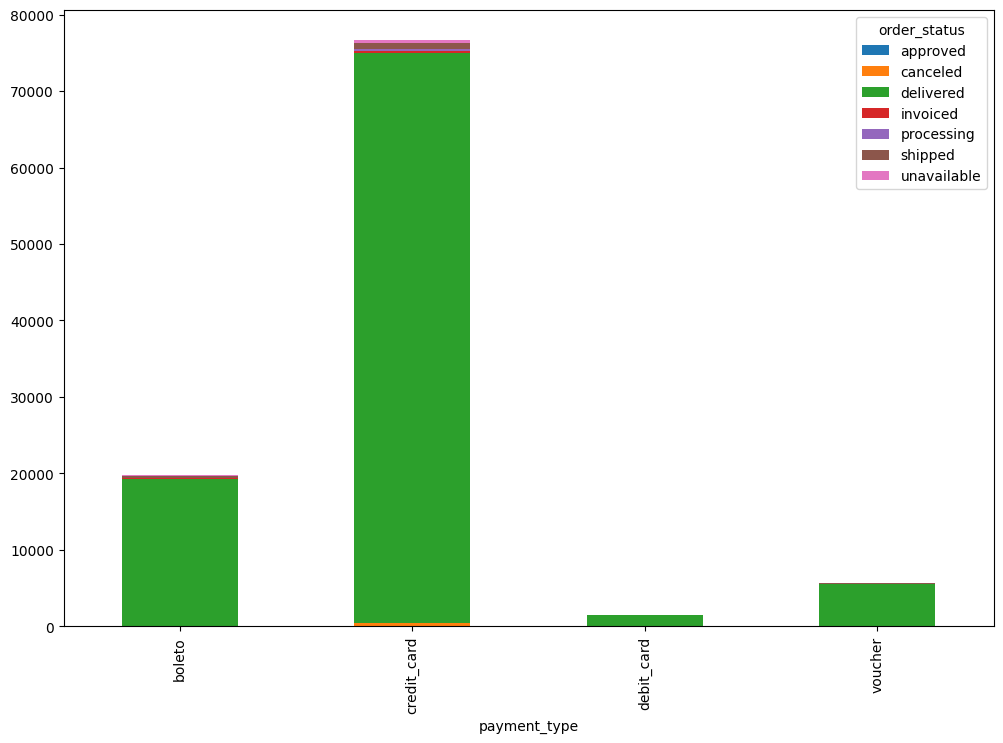

In [30]:
order_payments_orders = order_payments_df.merge(orders_df, on='order_id')
payment_status = order_payments_orders.groupby(['payment_type', 'order_status'])['order_id'].count().unstack().fillna(0)
payment_status.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.show()

Analisis ini akan membantu memahami bagaimana metode pembayaran mempengaruhi status pesanan.

#### 11. Kota di mana Penjualan Akan Untung

In [31]:
city_profit = orders_df.merge(customers_df, on='customer_id').merge(order_items_products, on='order_id').merge(products_df, on='product_id')
city_profit = city_profit.groupby('customer_city').agg({'price': 'sum', 'freight_value': 'sum'}).reset_index()
city_profit['profit'] = city_profit['price'] - city_profit['freight_value']
city_profit = city_profit.sort_values(by='profit', ascending=False).head(10)
fig = px.bar(city_profit, x='customer_city', y='profit', title='Kota dengan Profit Tertinggi', labels={'customer_city': 'Kota', 'profit': 'Profit'})
fig.show()

Analisis ini bertujuan untuk mengidentifikasi kota-kota yang memberikan keuntungan tertinggi dari penjualan.

## Conclusion

Setelah melakukan analisis terhadap berbagai pertanyaan bisnis, berikut adalah kesimpulan dari setiap analisis:

1. **Faktor yang mempengaruhi kepuasan pelanggan**: Waktu pengiriman berpengaruh signifikan terhadap kepuasan pelanggan, di mana pengiriman yang lebih cepat cenderung menghasilkan review score yang lebih tinggi.
2. **Traffic penjualan dari waktu ke waktu**: Terdapat pola tertentu dalam penjualan yang menunjukkan fluktuasi berdasarkan waktu, dengan puncak penjualan pada periode tertentu.
3. **Faktor yang mempengaruhi penjualan**: Harga produk memiliki hubungan positif dengan jumlah penjualan, di mana produk dengan harga yang lebih kompetitif cenderung terjual lebih banyak.
4. **Kota dengan pembelian terbanyak**: Kota-kota besar cenderung memiliki jumlah pembelian yang lebih tinggi dibandingkan dengan kota kecil.
5. **Distribusi geografis pelanggan dan penjual**: Terdapat pola distribusi yang menunjukkan konsentrasi pelanggan dan penjual di daerah tertentu, yang dapat mempengaruhi pengiriman.
6. **Hubungan antara harga produk dan jumlah penjualan**: Terdapat hubungan positif antara harga dan jumlah penjualan, meskipun ada batasan pada harga yang terlalu tinggi.
7. **Pengaruh waktu pengiriman terhadap kepuasan pelanggan**: Waktu pengiriman yang lebih cepat berhubungan dengan kepuasan pelanggan yang lebih tinggi.
8. **Pengaruh berat produk terhadap biaya pengiriman**: Produk yang lebih berat cenderung memiliki biaya pengiriman yang lebih tinggi.
9. **Kombinasi produk yang paling sering dibeli bersama**: Analisis asosiasi menunjukkan kombinasi produk tertentu yang sering dibeli bersama.
10. **Pola musiman dalam penjualan**: Terdapat pola musiman yang menunjukkan fluktuasi penjualan berdasarkan waktu dalam setahun.
11. **Kategori produk yang paling banyak dibeli**: Kategori produk tertentu, seperti elektronik, menunjukkan penjualan yang lebih tinggi dan berkontribusi signifikan terhadap pendapatan.
12. **Hubungan antara metode pembayaran dan status pesanan**: Metode pembayaran tertentu memiliki tingkat keberhasilan yang lebih tinggi dalam menyelesaikan pesanan.
13. **Kota dengan keuntungan tertinggi**: Kota-kota tertentu memberikan keuntungan yang lebih tinggi berdasarkan total penjualan dan biaya pengiriman.

Analisis ini memberikan wawasan yang berharga bagi perusahaan untuk meningkatkan strategi penjualan dan kepuasan pelanggan.
